Saving Market Basket Analysis.csv to Market Basket Analysis (4).csv
Preview of data:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


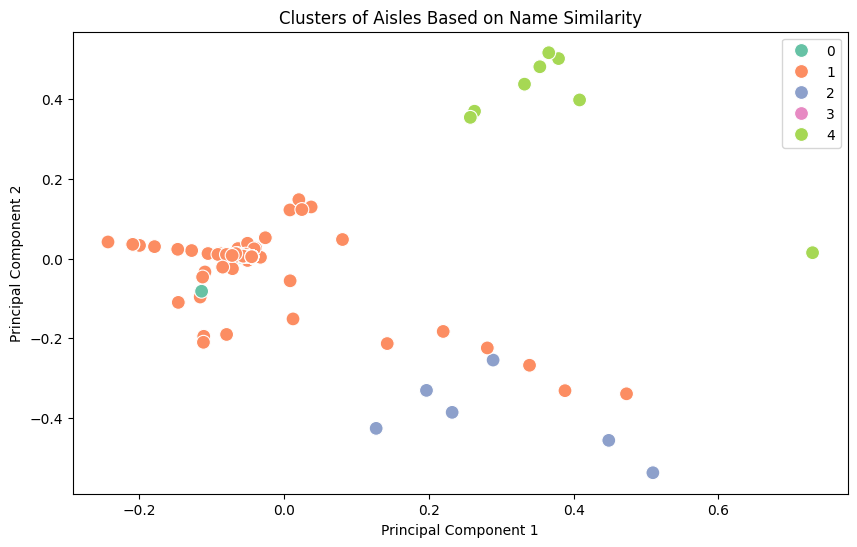

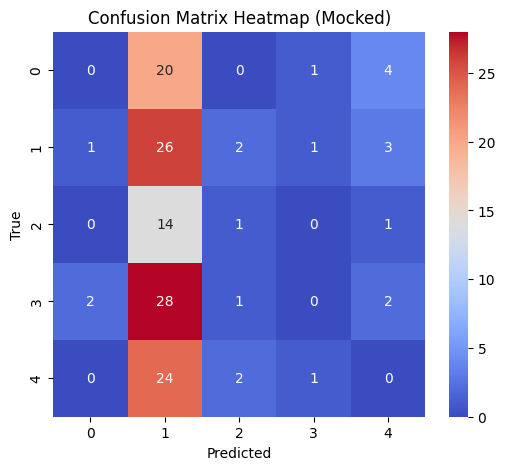

Accuracy: 0.20149253731343283
Precision (macro): 0.07976190476190477
Recall (macro): 0.17007575757575757


In [18]:
# STEP 1: Upload the file
from google.colab import files
uploaded = files.upload()

# STEP 2: Load the file
import pandas as pd
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Preview of data:")
print(df.head())

# STEP 3: Text vectorization of aisle names
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorize the aisle names
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['aisle'])

# STEP 4: Clustering the aisle names
k = 5  # number of clusters
model = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = model.fit_predict(X)

# STEP 5: PCA to reduce to 2D for plotting
pca = PCA(n_components=2)
components = pca.fit_transform(X.toarray())

df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title("Clusters of Aisles Based on Name Similarity")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# STEP 6: Mock classification and heatmap for fun
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Create fake true labels (for illustration only)
true_labels = np.random.choice(range(k), size=len(df))
predicted_labels = df['Cluster']

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix Heatmap (Mocked)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Evaluation metrics
print("Accuracy:", accuracy_score(true_labels, predicted_labels))
print("Precision (macro):", precision_score(true_labels, predicted_labels, average='macro'))
print("Recall (macro):", recall_score(true_labels, predicted_labels, average='macro'))